In [122]:
import pandas as pd
import seaborn as sns
import numpy as np
import notebook_toolkit as nt
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
sns.set_style('darkgrid')
%matplotlib inline
nt.set_environment()
%run variables.py
raw_df = pd.read_csv("analytic_data2019.csv")
from itertools import combinations, product
from sklearn.model_selection import KFold,cross_val_predict,cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

In [2]:
working_df = nt.drop_column_keyword_search(raw_df, keywords)

In [3]:
ten_percent_missing_values_columns = nt.column_null_percentage(working_df)
working_df = working_df.drop(columns = ten_percent_missing_values_columns.index)
working_df = working_df.drop(0)

In [4]:
string_datatype_df = working_df.iloc[:, 0:4]
float_datatype_df = working_df.iloc[:, 5:].astype(float)
working_df = pd.concat([string_datatype_df, float_datatype_df], axis = 1)

In [5]:
non_county_df = working_df[working_df[ranked].isnull()]
non_county_df.reset_index(inplace = True)
del non_county_df["index"], non_county_df[ranked]

In [6]:
county_level_df = working_df[working_df[ranked].notnull()]
county_level_df.reset_index(inplace = True)
del county_level_df["index"], county_level_df[ranked]

In [7]:
county_level_df = county_level_df.fillna(county_level_df.median())

In [8]:
non_county_df[free_lunch] = non_county_df[free_lunch].fillna(non_county_df[free_lunch].median())

In [9]:
del non_county_df[housing_costs], non_county_df[overcrowding]
del non_county_df[facilities], non_county_df[release_year]

In [10]:
non_county_df.iloc[2,35] = non_county_df.iloc[:,35].median()
non_county_df.iloc[12,35] = non_county_df.iloc[:,35].median()
non_county_df.iloc[12,36] = non_county_df.iloc[:,36].median()
non_county_df = non_county_df.fillna(non_county_df.mean())

In [11]:
national_level_df = non_county_df.iloc[0]
state_level_df = non_county_df.iloc[1:,:]

In [12]:
eda_df = county_level_df.copy()
eda_df = eda_df.drop(columns = ['Drinking water violations raw value', '% Asian raw value'])

In [13]:
to_drop = nt.multicolinear_drop(eda_df)

In [14]:
eda_df = eda_df.drop(eda_df[to_drop], axis =1)

In [15]:
clean_df = eda_df[features]

In [16]:
x_df = clean_df.drop(columns = ['Teen births raw value',
                                'State FIPS Code', 
                                'County FIPS Code', 
                                '5-digit FIPS Code',
                                'State Abbreviation'])

In [17]:
outcome = clean_df['Teen births raw value']
features = nt.norm_feat(x_df)

In [18]:
lm=LinearRegression()
lm.fit(features,outcome)
# Applying 5 folds on the training set and performing cross validation
Kfold = KFold(5)
baseline=np.mean(cross_val_score(lm,features,outcome,cv=Kfold))
# R-squared value from baseline model
print(baseline)

0.6496664100366882


In [48]:
regression = LinearRegression()

crossvalidation = KFold(n_splits=7, shuffle=True, random_state=42)
baseline_model = cross_validate(
    regression, X_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
baseline_model

{'fit_time': array([0.00910115, 0.00590396, 0.00548124, 0.00665808, 0.00764012,
        0.00855112, 0.0059588 ]),
 'score_time': array([0.00208688, 0.00228119, 0.00261569, 0.002455  , 0.00177503,
        0.00306106, 0.00162625]),
 'test_score': array([0.72107213, 0.69536791, 0.68806029, 0.70193445, 0.67423073,
        0.67193644, 0.72748381]),
 'train_score': array([0.70406272, 0.70870081, 0.71022608, 0.70750775, 0.71138014,
        0.71157544, 0.70349478])}

In [51]:
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, reg_poly.score(X_poly_train, y_train))

degree 2 0.8091951088781403
degree 3 0.7198118182126865
degree 4 0.2751188441380683


In [52]:
for index, degree in enumerate([2, 3, 4]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = cross_validate(
    regression, X_poly_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, reg_poly)

degree 2 {'fit_time': array([0.10222411, 0.0779109 , 0.08024597, 0.07876492, 0.07972574,
       0.07900906, 0.07501316]), 'score_time': array([0.00159001, 0.00084019, 0.00135779, 0.0010879 , 0.00124621,
       0.0013268 , 0.00085878]), 'test_score': array([0.46970847, 0.56266516, 0.68470974, 0.63288226, 0.61056901,
       0.63441442, 0.32711847]), 'train_score': array([0.82014658, 0.81445557, 0.82068915, 0.80841744, 0.81651606,
       0.8122286 , 0.60302268])}
degree 3 {'fit_time': array([8.88494086, 7.73671508, 7.85745907, 8.29048014, 7.17682695,
       7.45637321, 7.45553017]), 'score_time': array([0.00201011, 0.00200582, 0.00204992, 0.00212097, 0.0023911 ,
       0.00208783, 0.00206208]), 'test_score': array([-3.11469216e+00,  3.32509940e-01, -1.30078291e+02, -4.04073089e+00,
       -9.16428546e+01, -1.13140957e-01, -3.52414619e+00]), 'train_score': array([0.76055947, 0.72759171, 0.77898625, 0.72585694, 0.75298626,
       0.73593393, 0.74198304])}
degree 4 {'fit_time': array([16.640

In [19]:
y_df = clean_df['Teen births raw value']

#we have y_df as the target variable and x_df as the predictors (unnormalised)

In [27]:
# splitting the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.35, random_state=42)

In [32]:
#build a naive model baseline using unscaled linear regression
regression = LinearRegression()
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=42)
baseline_model_naive = cross_validate(
    regression, X_train, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)
baseline_model_naive

{'fit_time': array([0.02579308, 0.00622392, 0.00632787, 0.006464  , 0.00550294]),
 'score_time': array([0.002882  , 0.00238705, 0.00326037, 0.00211501, 0.00214982]),
 'test_score': array([0.69336874, 0.68845094, 0.71153068, 0.682163  , 0.706863  ]),
 'train_score': array([0.71491025, 0.71578745, 0.7094987 , 0.71775366, 0.71270269])}

In [33]:
#Normalise all data

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [34]:
# Build a linear regression using scaled data 
linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)

baseline_model_scaled = cross_validate(
    linreg_scaled, X_train_scaled, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

baseline_model_scaled

#no difference in values between baseline_model_naive and baseline_scaled

{'fit_time': array([0.01202083, 0.00384474, 0.00695586, 0.00504971, 0.00627899]),
 'score_time': array([0.001266  , 0.00110531, 0.00093126, 0.00108719, 0.00143099]),
 'test_score': array([0.69336874, 0.68845094, 0.71153068, 0.682163  , 0.706863  ]),
 'train_score': array([0.71491025, 0.71578745, 0.7094987 , 0.71775366, 0.71270269])}

In [35]:
#build a 2nd order polynomial regression dataset for predictors

poly = PolynomialFeatures(2)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
X_test_poly = pd.DataFrame(poly.fit_transform(X_test))

In [36]:
#build a linear regression using polynomial data (unscaled)

linreg_poly = LinearRegression()
linreg_poly.fit(X_train_poly, y_train)

baseline_model_poly = cross_validate(
    linreg_poly, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

baseline_model_poly

#massively over fitting


{'fit_time': array([0.06076217, 0.04911017, 0.05550289, 0.04674888, 0.04757023]),
 'score_time': array([0.00226784, 0.00230384, 0.00197911, 0.00214505, 0.00217772]),
 'test_score': array([0.38430483, 0.63465036, 0.04135699, 0.49333241, 0.23970176]),
 'train_score': array([0.82706941, 0.82408674, 0.81543829, 0.82800615, 0.81778419])}

In [37]:
#Normalise all polynomial data
ss = StandardScaler()
X_train_poly_scaled = ss.fit_transform(X_train_poly)
X_test_poly_scaled = ss.transform(X_test_poly)

In [38]:
lasso_poly_train = []
lasso_poly_test = []
alphas = []

for alpha in range(0,10):

    lasso = Lasso(alpha) 
    lasso.fit(X_train_poly, y_train)

    lasso_model_poly = cross_validate(
    lasso, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Lasso alpha = {lasso.alpha}")
    alphas.append(alpha)
    print()
    print(f'Lasso train score = {round(lasso_model_poly["train_score"].mean(),3)}')
    lasso_poly_train.append(round(lasso_model_poly["train_score"].mean(),3))
    print()
    print(f'Lasso test score = {round(lasso_model_poly["test_score"].mean(),3)}')
    lasso_poly_test.append(round(lasso_model_poly["test_score"].mean(),3))
    print()



Lasso alpha = 0

Lasso train score = 0.836

Lasso test score = 0.55

Lasso alpha = 1

Lasso train score = 0.737

Lasso test score = 0.063

Lasso alpha = 2

Lasso train score = 0.731

Lasso test score = 0.039

Lasso alpha = 3

Lasso train score = 0.727

Lasso test score = -0.024

Lasso alpha = 4

Lasso train score = 0.723

Lasso test score = -0.063

Lasso alpha = 5

Lasso train score = 0.72

Lasso test score = -0.09

Lasso alpha = 6

Lasso train score = 0.717

Lasso test score = -0.117

Lasso alpha = 7

Lasso train score = 0.715

Lasso test score = -0.141

Lasso alpha = 8

Lasso train score = 0.712

Lasso test score = -0.166

Lasso alpha = 9

Lasso train score = 0.709

Lasso test score = -0.193



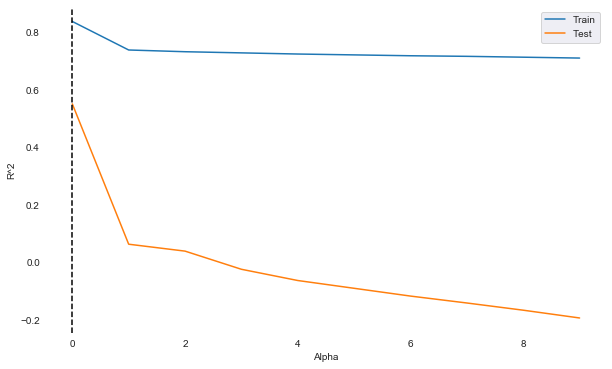

In [42]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 0

ax.plot(alphas, lasso_poly_train, label='Train')
ax.plot(alphas, lasso_poly_test, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();



In [40]:
lasso_poly_train_decimal = []
lasso_poly_test_decimal = []
alphas_decimal = []

for alpha in np.linspace(0, 1, num=11):

    lasso = Lasso(alpha) 
    lasso.fit(X_train_poly, y_train)

    lasso_model_poly = cross_validate(
    lasso, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Lasso alpha = {lasso.alpha}")
    alphas_decimal.append(alpha)
    print()
    print(f'Lasso train score = {round(lasso_model_poly["train_score"].mean(),3)}')
    lasso_poly_train_decimal.append(round(lasso_model_poly["train_score"].mean(),3))
    print()
    print(f'Lasso test score = {round(lasso_model_poly["test_score"].mean(),3)}')
    lasso_poly_test_decimal.append(round(lasso_model_poly["test_score"].mean(),3))
    print()

Lasso alpha = 0.0

Lasso train score = 0.836

Lasso test score = 0.55

Lasso alpha = 0.1

Lasso train score = 0.772

Lasso test score = 0.44

Lasso alpha = 0.2

Lasso train score = 0.761

Lasso test score = 0.361

Lasso alpha = 0.30000000000000004

Lasso train score = 0.756

Lasso test score = 0.294

Lasso alpha = 0.4

Lasso train score = 0.752

Lasso test score = 0.232

Lasso alpha = 0.5

Lasso train score = 0.748

Lasso test score = 0.166

Lasso alpha = 0.6000000000000001

Lasso train score = 0.743

Lasso test score = 0.109

Lasso alpha = 0.7000000000000001

Lasso train score = 0.74

Lasso test score = 0.073

Lasso alpha = 0.8

Lasso train score = 0.738

Lasso test score = 0.062

Lasso alpha = 0.9

Lasso train score = 0.737

Lasso test score = 0.063

Lasso alpha = 1.0

Lasso train score = 0.737

Lasso test score = 0.063



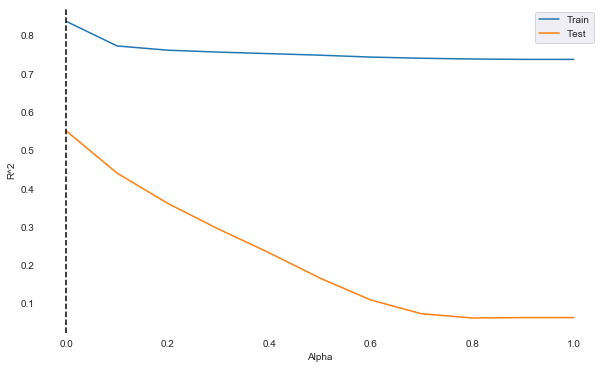

In [43]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 0
ax.plot(alphas_decimal, lasso_poly_train_decimal, label='Train')
ax.plot(alphas_decimal, lasso_poly_test_decimal, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

In [44]:
ridge_poly_train = []
ridge_poly_test = []
alphas = []

for alpha in range(0,10):

    ridge = Ridge(alpha) 
    ridge.fit(X_train_poly, y_train)

    ridge_model_poly = cross_validate(
    ridge, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Ridge alpha = {ridge.alpha}")
    alphas.append(alpha)
    print()
    print(f'Ridge train score = {round(ridge_model_poly["train_score"].mean(),3)}')
    ridge_poly_train.append(round(ridge_model_poly["train_score"].mean(),3))
    print()
    print(f'Ridge test score = {round(ridge_model_poly["test_score"].mean(),3)}')
    ridge_poly_test.append(round(ridge_model_poly["test_score"].mean(),3))
    print()


Ridge alpha = 0

Ridge train score = 0.826

Ridge test score = 0.386

Ridge alpha = 1

Ridge train score = 0.801

Ridge test score = 0.569

Ridge alpha = 2

Ridge train score = 0.798

Ridge test score = 0.568

Ridge alpha = 3

Ridge train score = 0.797

Ridge test score = 0.565

Ridge alpha = 4

Ridge train score = 0.796

Ridge test score = 0.562

Ridge alpha = 5

Ridge train score = 0.795

Ridge test score = 0.56

Ridge alpha = 6

Ridge train score = 0.794

Ridge test score = 0.558

Ridge alpha = 7

Ridge train score = 0.793

Ridge test score = 0.555

Ridge alpha = 8

Ridge train score = 0.793

Ridge test score = 0.553

Ridge alpha = 9

Ridge train score = 0.792

Ridge test score = 0.551



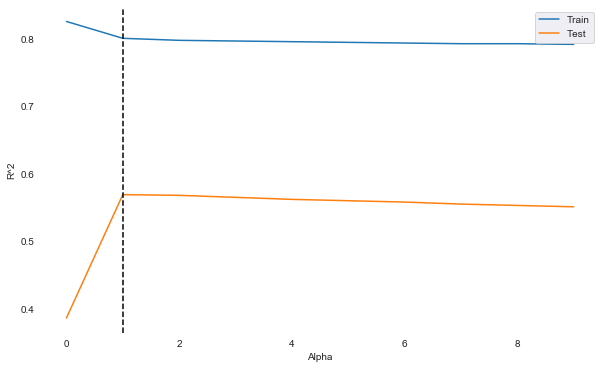

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 1
ax.plot(alphas, ridge_poly_train, label='Train')
ax.plot(alphas, ridge_poly_test, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

In [46]:
ridge_poly_train_decimal = []
ridge_poly_test_decimal = []
alphas_decimal = []

for alpha in np.linspace(0, 1, num=11):

    ridge = Ridge(alpha) 
    lasso.fit(X_train_poly, y_train)

    ridge_model_poly = cross_validate(
    ridge, X_train_poly, y_train, scoring='r2', cv=crossvalidation, return_train_score = True)

    print(f"Ridge alpha = {ridge.alpha}")
    alphas_decimal.append(alpha)
    print()
    print(f'Ridge train score = {round(ridge_model_poly["train_score"].mean(),3)}')
    ridge_poly_train_decimal.append(round(ridge_model_poly["train_score"].mean(),3))
    print()
    print(f'Ridge test score = {round(ridge_model_poly["test_score"].mean(),3)}')
    ridge_poly_test_decimal.append(round(ridge_model_poly["test_score"].mean(),3))
    print()

Ridge alpha = 0.0

Ridge train score = 0.826

Ridge test score = 0.386

Ridge alpha = 0.1

Ridge train score = 0.811

Ridge test score = 0.556

Ridge alpha = 0.2

Ridge train score = 0.807

Ridge test score = 0.56

Ridge alpha = 0.30000000000000004

Ridge train score = 0.806

Ridge test score = 0.563

Ridge alpha = 0.4

Ridge train score = 0.804

Ridge test score = 0.565

Ridge alpha = 0.5

Ridge train score = 0.804

Ridge test score = 0.566

Ridge alpha = 0.6000000000000001

Ridge train score = 0.803

Ridge test score = 0.567

Ridge alpha = 0.7000000000000001

Ridge train score = 0.802

Ridge test score = 0.568

Ridge alpha = 0.8

Ridge train score = 0.802

Ridge test score = 0.568

Ridge alpha = 0.9

Ridge train score = 0.801

Ridge test score = 0.568

Ridge alpha = 1.0

Ridge train score = 0.801

Ridge test score = 0.569



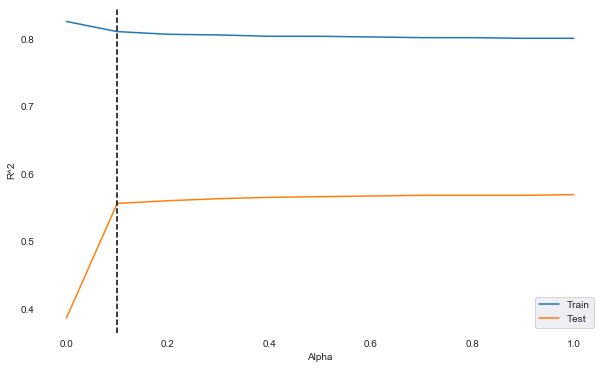

In [47]:
fig, ax = plt.subplots(figsize=(10,6))
optimal_alpha = 0.1
ax.plot(alphas_decimal, ridge_poly_train_decimal, label='Train')
ax.plot(alphas_decimal, ridge_poly_test_decimal, label='Test')
ax.set_xlabel('Alpha')
ax.set_ylabel('R^2')
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.axvline(optimal_alpha, color='black', linestyle='--')
ax.legend();

In [48]:
final_model_ridge = Ridge(1)
final_model = final_model_ridge.fit(X_train_poly, y_train)

In [66]:
coefficients = pd.DataFrame(final_model_ridge.coef_, poly.get_feature_names(X_train.columns))

In [79]:
coefficients = coefficients.rename(columns = {0 : "Coefficients"})

In [99]:
coefficients = coefficients.sort_values(by = "Coefficients", ascending = False);

In [105]:
coeffcient_strength = coefficients.head(10)

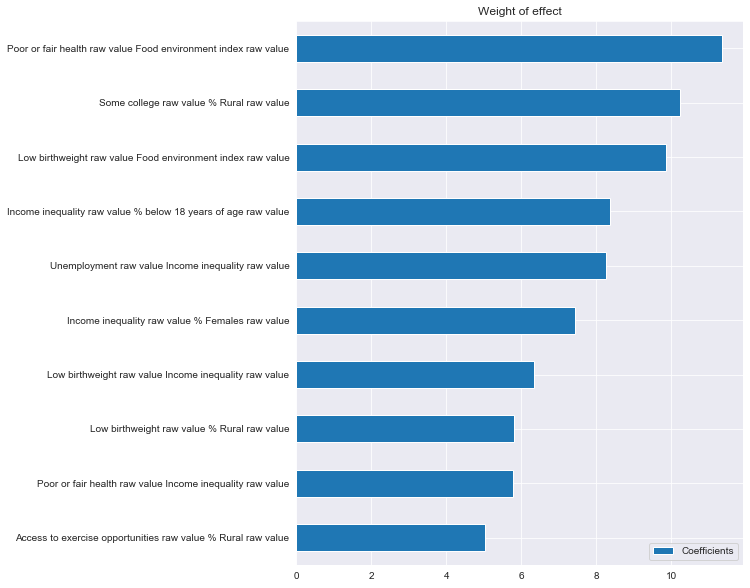

In [109]:
plt.rcParams['figure.figsize'] = (8.0, 10.0)
coeffcient_strength.plot(kind = "barh")
plt.title("Weight of effect")
plt.gca().invert_yaxis()

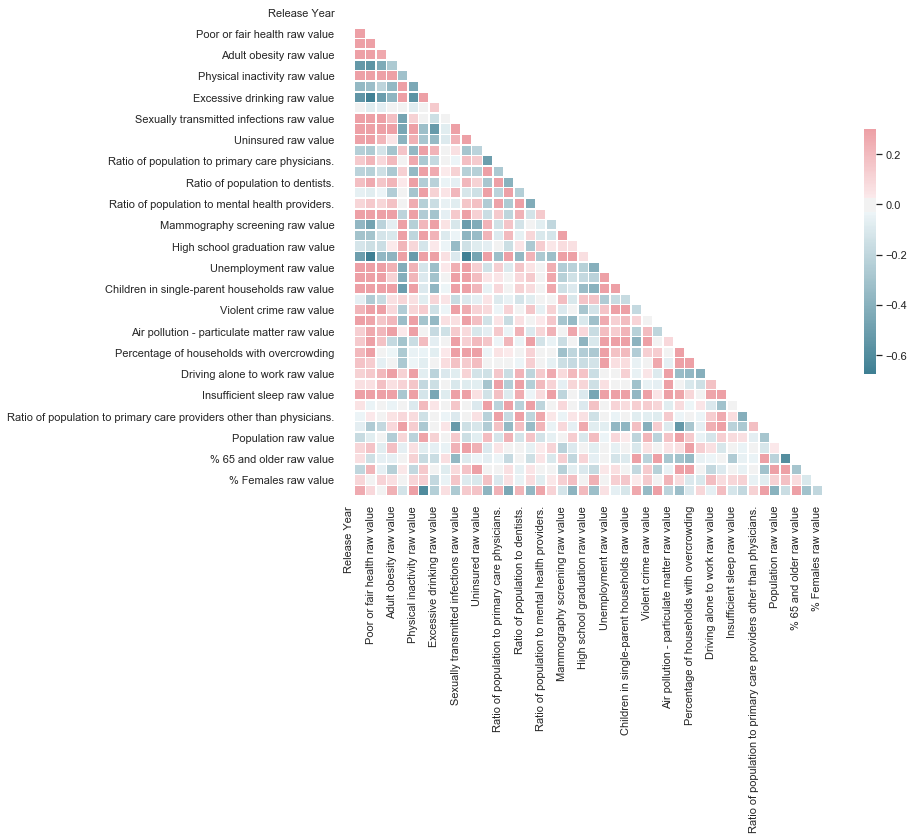

In [112]:
nt.correlation_matrix(eda_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


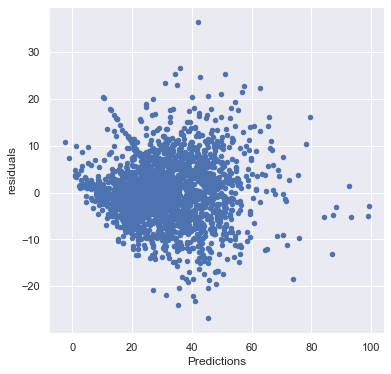

In [125]:
train_residuals = pd.DataFrame({"Predictions":final_model.predict(X_train_poly), "True_value":y_train})
data = train_residuals["residuals"] = train_residuals["True_value"] - train_residuals["Predictions"]
train_residuals.plot(x="Predictions", y="residuals",kind = "scatter");

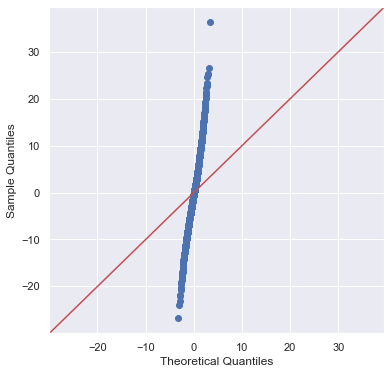

In [126]:
sm.qqplot(data, line ='45') 
py.show() 